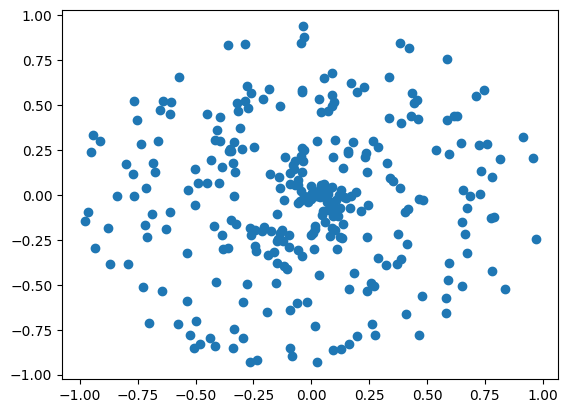

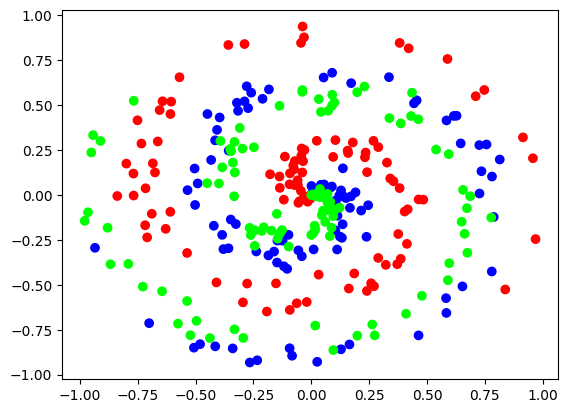

In [ ]:
import numpy as np
np.random.seed(0)

def create_data(points, classes):
    X = np.zeros((points*classes, 2))
    Y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0,1,points)
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        Y[ix] = class_number
    return X, Y

import matplotlib.pyplot as plt

A, B = create_data(100,3)

plt.scatter(A[:,0], A[:,1])
plt.show()

plt.scatter(A[:,0], A[:,1], c=y, cmap="brg")
plt.show()

In [13]:
import numpy as np
import nnfs 
from nnfs.datasets import spiral_data

nnfs.init()

np.random.seed(0)
X = np.array([
    [1,2,3,2.5],
    [2,5,-1,2],
    [-1.5,2.7,3.3,-0.8]
])

X, y = spiral_data(100, 3)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.outputs = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

layer_1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()

layer_1.forward(X)
# print(layer_1.outputs)
activation1.forward(layer_1.outputs)
print(activation1.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.07817926e-01 0.00000000e+00 0.00000000e+00 8.72561932e-02
  0.00000000e+00]]
